In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib

In [2]:
#read an image
img  = cv2.imread('./test_images/640px-Virat_Kohli.jpg')
img.shape

(854, 640, 3)

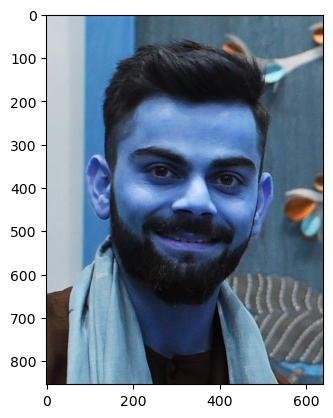

In [3]:
#if u want to show the image
plt.imshow(img)
# plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))   #convert brg to rgb

In [4]:
#to remove all the dimension then  use gray
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(854, 640)

In [5]:
gray

array([[213, 214, 216, ..., 128, 130, 131],
       [213, 214, 215, ..., 127, 129, 129],
       [213, 214, 215, ..., 126, 127, 128],
       ...,
       [ 38,  36,  35, ...,  99, 100,  97],
       [ 37,  35,  35, ..., 100, 100,  96],
       [ 37,  35,  35, ..., 101, 102,  99]], dtype=uint8)

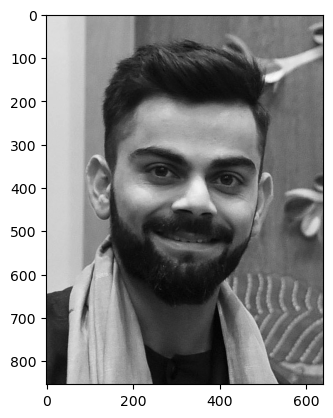

In [6]:
plt.imshow(gray,cmap='gray') #cmap = color map

In [7]:
#note: when we write the path we should add .xml extension 
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')
faces = face_cascade.detectMultiScale(gray,1.3,5)
faces    #output: [[x,y,width,height]]

array([[102, 192, 469, 469]])

In [8]:
(x,y,w,h) = faces[0]
x,y,w,h

(102, 192, 469, 469)

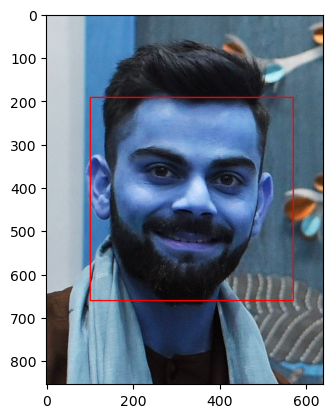

In [9]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

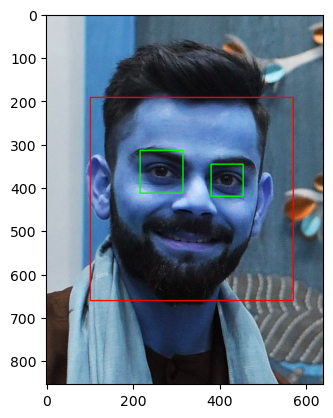

In [10]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h,x:x+w]
    roi_color = face_img[y:y+h,x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        eye_img = cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
plt.figure()
plt.imshow(face_img,cmap='gray')
plt.show()

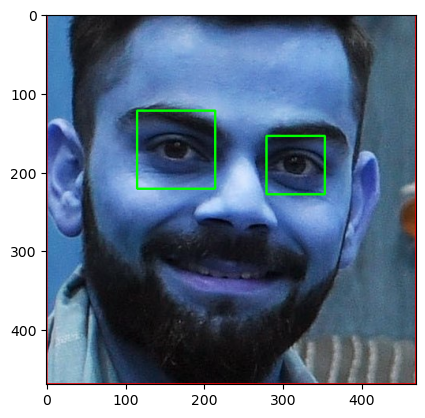

In [11]:
plt.imshow(roi_color,cmap='gray')

In [12]:
#let run a function where we simply put a image and then the function can give crop image
def get_cropped_image_if_2_eye(image_path):
    img = cv2.imread(image_path)
    if(img is not None):
        cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray,1.3,5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >=2:
            return roi_color

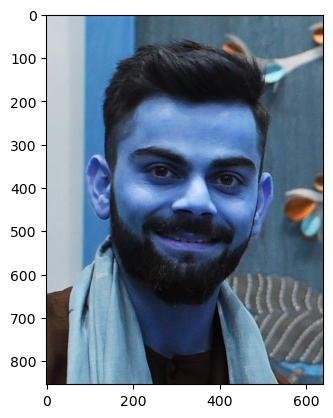

In [13]:
original_image = cv2.imread('./test_images/640px-Virat_Kohli.jpg')
plt.imshow(original_image)

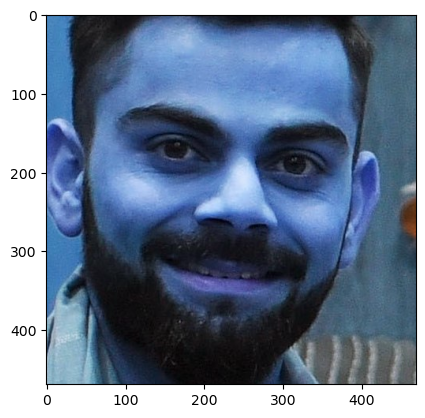

In [14]:
cropped_image =  get_cropped_image_if_2_eye('./test_images/640px-Virat_Kohli.jpg')
plt.imshow(cropped_image)

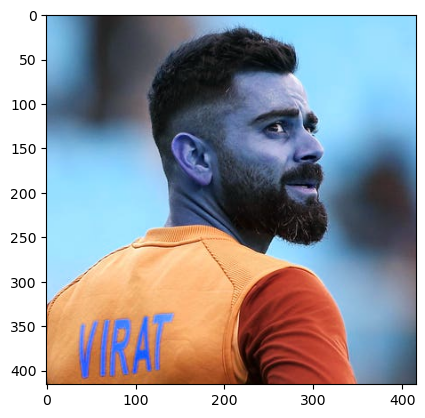

In [15]:
org_image_obstructed = cv2.imread('./test_images/0x0.jpg')
plt.imshow(org_image_obstructed)

In [16]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eye('./test_images/0x0.jpg')
cropped_image_no_2_eyes

In [17]:
# now we store the cropped image in the dataset folder
path_to_data = './datasets/'
path_to_cr_data = './datasets/cropped/'

In [18]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [19]:
img_dirs

['./datasets/cropped',
 './datasets/neeraj_chopra',
 './datasets/pv_sindhu',
 './datasets/sania_mirza',
 './datasets/sunil_chhetri',
 './datasets/virat_kohli']

In [20]:
#we are making a cropped folder if there is no cropped images
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [21]:
#Now we make a seperate folder of each celebrity name in  cropped folder 
cropped_img_dir = []
celebrity_files_names_dir = {}
for img_dir in img_dirs:
    count = 1
    celebrity_names = img_dir.split('/')[-1]
    print(celebrity_names)
    celebrity_files_names_dir[celebrity_names] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eye(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_names
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_img_dir.append(cropped_folder)
                print("Generating cropped images in the folder",cropped_folder)
                
            cropped_file_name = celebrity_names + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
                
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_files_names_dir[celebrity_names].append(cropped_file_path)
            count +=1

cropped
neeraj_chopra
Generating cropped images in the folder ./datasets/cropped/neeraj_chopra
pv_sindhu
Generating cropped images in the folder ./datasets/cropped/pv_sindhu
sania_mirza
Generating cropped images in the folder ./datasets/cropped/sania_mirza
sunil_chhetri
Generating cropped images in the folder ./datasets/cropped/sunil_chhetri
virat_kohli
Generating cropped images in the folder ./datasets/cropped/virat_kohli


## Feature engineering

In [22]:
import pywt   

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

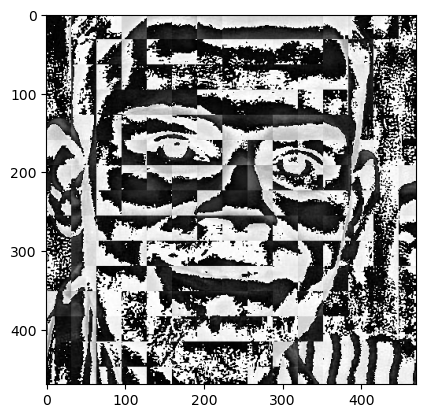

In [23]:
im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har, cmap='gray')

In [24]:
celebrity_files_names_dir = {}
for img_dir in cropped_img_dir:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_files_names_dir[celebrity_name] = file_list
celebrity_files_names_dir

{'neeraj_chopra': ['./datasets/cropped/neeraj_chopra\\neeraj_chopra1.png',
  './datasets/cropped/neeraj_chopra\\neeraj_chopra10.png',
  './datasets/cropped/neeraj_chopra\\neeraj_chopra11.png',
  './datasets/cropped/neeraj_chopra\\neeraj_chopra12.png',
  './datasets/cropped/neeraj_chopra\\neeraj_chopra13.png',
  './datasets/cropped/neeraj_chopra\\neeraj_chopra14.png',
  './datasets/cropped/neeraj_chopra\\neeraj_chopra2.png',
  './datasets/cropped/neeraj_chopra\\neeraj_chopra3.png',
  './datasets/cropped/neeraj_chopra\\neeraj_chopra4.png',
  './datasets/cropped/neeraj_chopra\\neeraj_chopra5.png',
  './datasets/cropped/neeraj_chopra\\neeraj_chopra6.png',
  './datasets/cropped/neeraj_chopra\\neeraj_chopra7.png',
  './datasets/cropped/neeraj_chopra\\neeraj_chopra8.png',
  './datasets/cropped/neeraj_chopra\\neeraj_chopra9.png'],
 'pv_sindhu': ['./datasets/cropped/pv_sindhu\\pv_sindhu1.png',
  './datasets/cropped/pv_sindhu\\pv_sindhu10.png',
  './datasets/cropped/pv_sindhu\\pv_sindhu11.png',


In [25]:
class_dict = {}
count=0
for celebrity_names in celebrity_files_names_dir.keys():
    class_dict[celebrity_names] = count
    count = count+1
class_dict

{'neeraj_chopra': 0,
 'pv_sindhu': 1,
 'sania_mirza': 2,
 'sunil_chhetri': 3,
 'virat_kohli': 4}

In [26]:
#Now we iterate the dict by items function
x=[]
y=[]
for celebrity_names, training_files in celebrity_files_names_dir.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img = cv2.resize(img,(32,32))
        img_har = w2d(img,'db1',5)
        scalled_raw_har = cv2.resize(img_har,(32,32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_raw_har.reshape(32*32,1)))
        x.append(combined_img)
        y.append(class_dict[celebrity_names])

In [27]:
len(x[0])   #total size

4096

In [28]:
x = np.array(x).reshape(len(x),4096).astype(float)
x.shape

(81, 4096)

 ## Data cleaning is read now we are ready to train our model

In [29]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn import svm

In [30]:
X_train, X_test, y_train, y_test =train_test_split(x,y,test_size=0.2,random_state=0)
pipe = Pipeline([('standardscaler',StandardScaler()),('svc',SVC(kernel='rbf',C=10))])
pipe.fit(X_train,y_train)
pipe.score(X_test,y_test)

0.8235294117647058

In [31]:
len(X_test)

17

In [32]:
print(classification_report(y_test,pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.67      1.00      0.80         4
           2       0.00      0.00      0.00         1
           3       1.00      0.50      0.67         2
           4       0.89      1.00      0.94         8

    accuracy                           0.82        17
   macro avg       0.71      0.60      0.61        17
weighted avg       0.81      0.82      0.79        17



C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
#Grid search
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [34]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.705128,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.641026,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.580769,{'logisticregression__C': 1}


In [35]:
best_estimators['svm'].score(X_test,y_test)

0.8823529411764706

In [36]:
best_estimators['random_forest'].score(X_test,y_test)

0.5882352941176471

In [37]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.8235294117647058

In [38]:
best_clf = best_estimators['svm']

In [39]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,best_clf.predict(X_test))
cm

array([[2, 0, 0, 0, 0],
       [0, 4, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 1, 0, 1, 0],
       [0, 0, 0, 0, 8]], dtype=int64)

<function matplotlib.pyplot.legend(*args, **kwargs)>

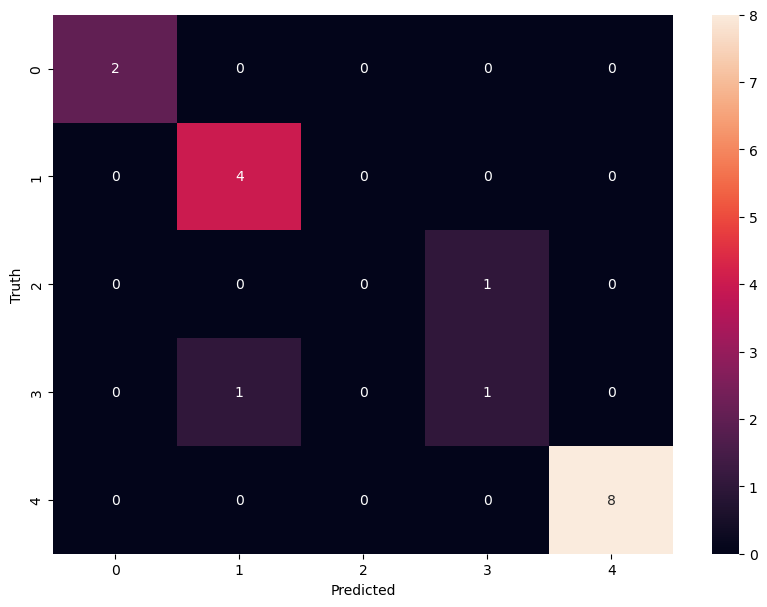

In [40]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.legend

In [41]:
class_dict

{'neeraj_chopra': 0,
 'pv_sindhu': 1,
 'sania_mirza': 2,
 'sunil_chhetri': 3,
 'virat_kohli': 4}

## Save the model in a file

In [42]:
import joblib
# save the model in a pickle file
joblib.dump(best_clf,'save_model.pkl')

['save_model.pkl']

## Save the class dict

In [43]:
import json
with open('class_dictionary.json',"w") as f:
    f.write(json.dumps(class_dict))